# AI project on cancer

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('CancerData.csv')

df.describe()

,ID,Radius_Mean,Tex_Mean,Peri_Mean,Area_Mean,Smooth_Mean,Compact_Mean,Concavity_Mean,ConPoints_Mean,Symm_Mean,...,Radius_Worst,Tex_Worst,Peri_Worst,Area_Worst,Smooth_Worst,Compact_Worst,Concavity_Worst,ConPoints_Worst,Symm_Worst,FracDim_Worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


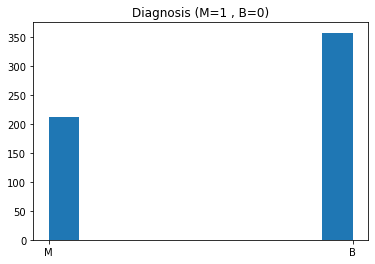

In [4]:
plt.hist(df['Diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

# Separating the dependent and independent variable
y = df['Diagnosis']
X = df.drop('Diagnosis', axis = 1)
X = X.drop('ID', axis = 1)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Model Creation & Scoring of the Dataset 

In [5]:
K = []
training = []
test = []
scores = {}
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [6]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9447236180904522, 0.9298245614035088]
3 : [0.9522613065326633, 0.9181286549707602]
4 : [0.9447236180904522, 0.9298245614035088]
5 : [0.9396984924623115, 0.9473684210526315]
6 : [0.9371859296482412, 0.9473684210526315]
7 : [0.9371859296482412, 0.9532163742690059]
8 : [0.9321608040201005, 0.9532163742690059]
9 : [0.9321608040201005, 0.9590643274853801]
10 : [0.9321608040201005, 0.9649122807017544]
11 : [0.9346733668341709, 0.9649122807017544]
12 : [0.9321608040201005, 0.9649122807017544]
13 : [0.9296482412060302, 0.9649122807017544]
14 : [0.9296482412060302, 0.9649122807017544]
15 : [0.9321608040201005, 0.9649122807017544]
16 : [0.9271356783919598, 0.9649122807017544]
17 : [0.9321608040201005, 0.9649122807017544]
18 : [0.9221105527638191, 0.9649122807017544]
19 : [0.9246231155778895, 0.9649122807017544]
20 : [0.9170854271356784, 0.9649122807017544]


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


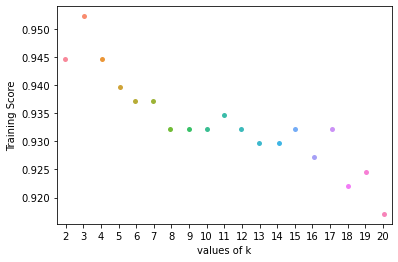

In [7]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()
# function to show plot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


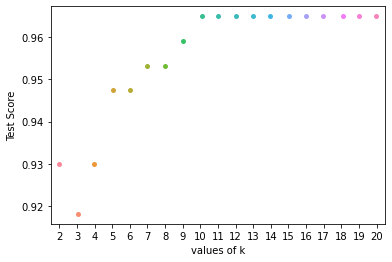

In [8]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

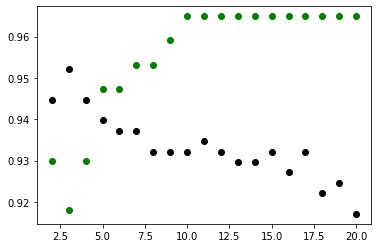

In [9]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots

In [10]:
# Prediction

y_pred= clf.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

In [11]:
# Accuracy Score

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

96.49122807017544

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[106,   4],
       [  2,  59]], dtype=int64)

<AxesSubplot:>

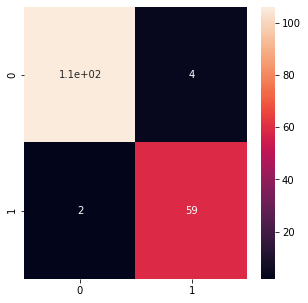

In [13]:
# HEATMAP

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
import seaborn as sns
sns.heatmap(cm, annot = True)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           B       0.98      0.96      0.97       110
           M       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [17]:
import inspect 
from sklearn.utils.testing import all_estimators 
for name, clf in all_estimators(type_filter='classifier'): 
    if 'sample_weight' in inspect.getargspec(clf.fit)[0]: 
        print(name) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GradientBoostingClassifier
HistGradientBoostingClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
MultiOutputClassifier
MultinomialNB
NuSVC
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


<ipython-input-17-7ef36e6e7daa>:4: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  if 'sample_weight' in inspect.getargspec(clf.fit)[0]:


# Implementation of Bagging and Boosting using Decision Tree Classifier as Base Estimator

In [22]:
# to create the DT model - base estimator (entropy)
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy') 

# train the classifier on training data
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
y_pred = DTC.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

# Boosting Model

In [25]:
# to create boosting model

from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(base_estimator = DTC, n_estimators = 400, learning_rate = 1)

boostmodel = AdaBoost.fit(X_train, y_train)

In [26]:
y_boostpred = boostmodel.predict(X_test)
y_boostpred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

In [27]:
#accuracy of boosted model
from sklearn.metrics import accuracy_score
accuracy_score(y_boostpred, y_test)*100

93.56725146198829

In [28]:
#confusion matrix for boosted model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_boostpred,y_test)
cm

array([[100,   3],
       [  8,  60]], dtype=int64)

In [29]:
#performance report for boosted model
from sklearn.metrics import classification_report
print(classification_report(y_boostpred,y_test))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       103
           M       0.95      0.88      0.92        68

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# Bagging Model

In [30]:
# to create bagging model

from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(base_estimator = DTC, n_estimators = 400, max_samples = 0.8, oob_score = True, random_state = 0)

Bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=0.8, n_estimators=400, oob_score=True,
                  random_state=0)

In [32]:
y_bagpred = Bag.predict(X_test)
y_bagpred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

In [34]:
#for bagging model
accuracy_score(y_bagpred, y_test)*100

95.90643274853801

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_bagpred,y_test)
cm

array([[106,   5],
       [  2,  58]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_bagpred,y_test))

              precision    recall  f1-score   support

           B       0.98      0.95      0.97       111
           M       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# THANK YOU